# WeatherPy
----
Visualize the weather of 500+ cities across the world of varying distance from the equator. Cities have been randonly generated. 

#### Observations
* 
*  
* 

#### Table of Contents

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

**After each plot add a sentence or too explaining what the code is and analyzing.**

Run linear regression on each relationship:

* Northern Hemisphere - Temperature (F) vs. Latitude
* Southern Hemisphere - Temperature (F) vs. Latitude
* Northern Hemisphere - Humidity (%) vs. Latitude
* Southern Hemisphere - Humidity (%) vs. Latitude
* Northern Hemisphere - Cloudiness (%) vs. Latitude
* Southern Hemisphere - Cloudiness (%) vs. Latitude
* Northern Hemisphere - Wind Speed (mph) vs. Latitude
* Southern Hemisphere - Wind Speed (mph) vs. Latitude

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
from scipy.stats import linregress
from pprint import pprint
import requests
from tqdm import tqdm
import datetime
import scipy.stats as stats

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [164]:
# Create DataFrame: Insert generated list of cities
cities_df = pd.DataFrame(cities,columns=['City_Name'])
cities_df

,City_Name
0,mataura
1,butaritari
2,san quintin
3,georgetown
4,homer
...,...
611,honiara
612,qobustan
613,juneau
614,miramar


In [165]:
# Set up additional columns to hold information after loop
cities_df['Lat'] = ""
cities_df['Lon'] = ""
cities_df['Max_Temp'] = ""
cities_df['Humidity'] = ""
cities_df['Cloudiness'] = ""
cities_df['Wind_Speed'] = ""
cities_df['Country'] = ""
cities_df['Date'] = ""
cities_df.head()

,City_Name,Lat,Lon,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,mataura,,,,,,,,
1,butaritari,,,,,,,,
2,san quintin,,,,,,,,
3,georgetown,,,,,,,,
4,homer,,,,,,,,


In [166]:
# URL and Parameters
base_url = 'http://api.openweathermap.org/data/2.5/weather?'
params_weather = {'units': 'imperial',
                  'APPID': weather_api_key
                 }

# use iterrows to iterate through pandas dataframe
print('''Beginning Data Retrieval 
-----------------------------''')

for index, row in cities_df.iterrows():

    # get restaurant type from df
    city_names = row['City_Name']

    # add keyword to params dict
    params_weather['q'] = city_names

    # assemble url and make API request
    print(f"Retrieving Results for Index {index}: {city_names}.")
    response = requests.get(base_url, params=params_weather).json()
    
    # extract results
    results = response
    
    try:
        print(f"Adding {city_names} to df as index number {index}.")
        
        cities_df.loc[index, 'Lat'] = results['coord']['lat']
        cities_df.loc[index, 'Lon'] = results['coord']['lon']
        cities_df.loc[index, 'Max_Temp'] = results['main']['temp_max']
        cities_df.loc[index, 'Humidity'] = results['main']['humidity']
        cities_df.loc[index, 'Cloudiness'] = results['clouds']['all']
        cities_df.loc[index, 'Wind_Speed'] = results['wind']['speed']
        cities_df.loc[index, 'Country'] = results['sys']['country']
        cities_df.loc[index, 'Date'] = results['dt']
        
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        
print('''------------
    Completed
    ------------''')

Beginning Data Retrieval 
-----------------------------
Retrieving Results for Index 0: mataura.
Adding mataura to df as index number 0.
Retrieving Results for Index 1: butaritari.
Adding butaritari to df as index number 1.
Retrieving Results for Index 2: san quintin.
Adding san quintin to df as index number 2.
Retrieving Results for Index 3: georgetown.
Adding georgetown to df as index number 3.
Retrieving Results for Index 4: homer.
Adding homer to df as index number 4.
Retrieving Results for Index 5: barsi.
Adding barsi to df as index number 5.
Retrieving Results for Index 6: bluff.
Adding bluff to df as index number 6.
Retrieving Results for Index 7: guerrero negro.
Adding guerrero negro to df as index number 7.
Retrieving Results for Index 8: yumen.
Adding yumen to df as index number 8.
Retrieving Results for Index 9: pevek.
Adding pevek to df as index number 9.
Retrieving Results for Index 10: ushuaia.
Adding ushuaia to df as index number 10.
Retrieving Results for Index 11: yaan

In [167]:
cities_df.head()

,City_Name,Lat,Lon,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,mataura,-46.19,168.86,58.95,74,83,2.93,NZ,1588477503
1,butaritari,3.07,172.79,83.35,81,32,14.79,KI,1588477241
2,san quintin,30.48,-115.95,64.45,77,0,14.63,MX,1588477261
3,georgetown,5.41,100.34,89.6,70,20,5.82,MY,1588477391
4,homer,59.64,-151.55,51.8,53,40,8.05,US,1588477462


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
# Saving: Export raw data, from cities_df to .csv
cities_df.to_csv('./output/random_cities.csv', encoding='utf-8', index=False)

**Run from here w/out re-running api request.**

In [3]:
# Load: CSV
# Loading CSV to not re-run data everytime. 
# Used as a checkpoint
cities_csv_df = pd.read_csv('./output/random_cities.csv', encoding='utf-8')
cities_csv_df.head()

,Unnamed: 0,City_Name,Lat,Lon,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,0,mataura,-46.19,168.86,58.95,74.0,83.0,2.93,NZ,1.588478e+09
1,1,butaritari,3.07,172.79,83.35,81.0,32.0,14.79,KI,1.588477e+09
2,2,san quintin,30.48,-115.95,64.45,77.0,0.0,14.63,MX,1.588477e+09
3,3,georgetown,5.41,100.34,89.60,70.0,20.0,5.82,MY,1.588477e+09
4,4,homer,59.64,-151.55,51.80,53.0,40.0,8.05,US,1.588477e+09


In [4]:
# drop unnamed if needed
cities_csv_df=cities_csv_df.drop(['Unnamed: 0'], axis=1)

In [5]:
# Count before dropping rows with null values
# Keeping 'Unnamed: 0'. Contains index numbers. Used for removing items later.
cities_csv_df.count()

City_Name     616
Lat           576
Lon           576
Max_Temp      576
Humidity      576
Cloudiness    576
Wind_Speed    576
Country       573
Date          576
dtype: int64

In [6]:
# Drop rows missing valies
cities_csv_df=cities_csv_df.dropna()

In [7]:
# Count after dropping rows with null values
cities_csv_df.count()

City_Name     573
Lat           573
Lon           573
Max_Temp      573
Humidity      573
Cloudiness    573
Wind_Speed    573
Country       573
Date          573
dtype: int64

In [8]:
cities_csv_df.head()

,City_Name,Lat,Lon,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,mataura,-46.19,168.86,58.95,74.0,83.0,2.93,NZ,1.588478e+09
1,butaritari,3.07,172.79,83.35,81.0,32.0,14.79,KI,1.588477e+09
2,san quintin,30.48,-115.95,64.45,77.0,0.0,14.63,MX,1.588477e+09
3,georgetown,5.41,100.34,89.60,70.0,20.0,5.82,MY,1.588477e+09
4,homer,59.64,-151.55,51.80,53.0,40.0,8.05,US,1.588477e+09


In [9]:
# Copy df for editing
cities_filtered = cities_csv_df.copy()

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
cities_filtered.loc[cities_filtered['Humidity'] > 99].index

Int64Index([114, 144, 176, 229, 282, 363, 401, 416, 530, 612], dtype='int64')

In [11]:
# Remove humidity over 100
humid_check = cities_filtered['Humidity'] > 100
humid_check.value_counts()

False    573
Name: Humidity, dtype: int64

In [12]:
cities_describe = cities_filtered.describe()
cities_describe

,Lat,Lon,Max_Temp,Humidity,Cloudiness,Wind_Speed,Date
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,5.730000e+02
mean,21.228901,18.883333,62.428761,69.799302,54.511344,7.560401,1.588478e+09
std,33.535490,89.975282,19.336391,21.792245,37.262609,5.057956,8.049327e+01
min,-54.800000,-175.200000,8.600000,8.000000,0.000000,0.270000,1.588477e+09
25%,-6.980000,-62.950000,50.000000,60.000000,20.000000,3.650000,1.588478e+09
50%,25.990000,25.570000,64.400000,74.000000,61.000000,6.330000,1.588478e+09
75%,50.230000,95.680000,78.010000,86.000000,90.000000,10.290000,1.588478e+09
max,77.480000,179.320000,101.440000,100.000000,100.000000,34.630000,1.588478e+09


In [13]:
#  Get the indices of cities that have humidity over 100%.
# If none found, will be empty
humidity_over_100_indices=cities_filtered.loc[cities_filtered['Humidity'] > 100].index
humidity_over_100_indices

Int64Index([], dtype='int64')

In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = cities_filtered.drop(index=humidity_over_100_indices)
clean_city_data.head()

,City_Name,Lat,Lon,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,mataura,-46.19,168.86,58.95,74.0,83.0,2.93,NZ,1.588478e+09
1,butaritari,3.07,172.79,83.35,81.0,32.0,14.79,KI,1.588477e+09
2,san quintin,30.48,-115.95,64.45,77.0,0.0,14.63,MX,1.588477e+09
3,georgetown,5.41,100.34,89.60,70.0,20.0,5.82,MY,1.588477e+09
4,homer,59.64,-151.55,51.80,53.0,40.0,8.05,US,1.588477e+09


In [15]:
# Export the clean_city_data into a csv
clean_city_data.to_csv('./output/clean_city_data.csv', encoding='utf-8', index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [16]:
# Load clean_city_data.csv
# Create new DF 
lat_vs_temp_full_df = pd.read_csv('./output/clean_city_data.csv', encoding='utf-8')
lat_vs_temp_full_df.head()

,City_Name,Lat,Lon,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,mataura,-46.19,168.86,58.95,74.0,83.0,2.93,NZ,1.588478e+09
1,butaritari,3.07,172.79,83.35,81.0,32.0,14.79,KI,1.588477e+09
2,san quintin,30.48,-115.95,64.45,77.0,0.0,14.63,MX,1.588477e+09
3,georgetown,5.41,100.34,89.60,70.0,20.0,5.82,MY,1.588477e+09
4,homer,59.64,-151.55,51.80,53.0,40.0,8.05,US,1.588477e+09


In [17]:
# Extract relevant fields from the data frame
# Remove unused columns leaving Max_temp and Lat for plotting
lat_vs_temp_df=lat_vs_temp_full_df[['Max_Temp', 'Lat']]
lat_vs_temp_df.head()

,Max_Temp,Lat
0,58.95,-46.19
1,83.35,3.07
2,64.45,30.48
3,89.60,5.41
4,51.80,59.64


In [18]:
# Get Date value of retreived data. 
# Importing date into plot title.
date_retreived_data = datetime.datetime.fromtimestamp(int(lat_vs_temp_full_df['Date'][1])).strftime('%m/%d/%Y')

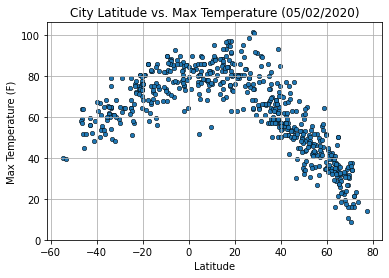

In [19]:
# Create Scatter Plot displaying Latitude to Max Temperature (F)
lat_vs_temp_df.plot('Lat', 'Max_Temp', kind='scatter', grid=True, title=f'City Latitude vs. Max Temperature ({date_retreived_data})', edgecolors='black', linewidths=.5, yticks=(np.arange(0, 101, 20)))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Save Scatter Plot and display plot
plt.savefig("./output/lat_vs_temp_scatter.png")
plt.show()

## Latitude vs. Humidity Plot

In [20]:
# Load clean_city_data.csv
# Create new DF 
lat_vs_humid_full_df = pd.read_csv('./output/clean_city_data.csv', encoding='utf-8')
lat_vs_humid_full_df.head()

,City_Name,Lat,Lon,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,mataura,-46.19,168.86,58.95,74.0,83.0,2.93,NZ,1.588478e+09
1,butaritari,3.07,172.79,83.35,81.0,32.0,14.79,KI,1.588477e+09
2,san quintin,30.48,-115.95,64.45,77.0,0.0,14.63,MX,1.588477e+09
3,georgetown,5.41,100.34,89.60,70.0,20.0,5.82,MY,1.588477e+09
4,homer,59.64,-151.55,51.80,53.0,40.0,8.05,US,1.588477e+09


In [21]:
# Remove unused columns leaving Humidity and Lat for plotting
lat_vs_humid_df=lat_vs_humid_full_df[['Humidity', 'Lat']]
lat_vs_humid_df.head()

,Humidity,Lat
0,74.0,-46.19
1,81.0,3.07
2,77.0,30.48
3,70.0,5.41
4,53.0,59.64


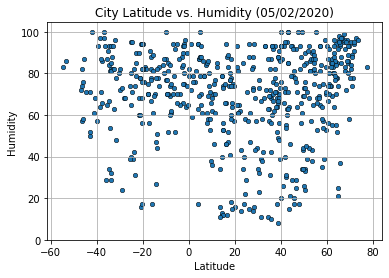

In [22]:
# Create Scatter Plot displaying Latitude to Max Temperature (F)
lat_vs_humid_df.plot('Lat', 'Humidity', kind='scatter', grid=True, title=f'City Latitude vs. Humidity ({date_retreived_data})', edgecolors='black', linewidths=.5, yticks=(np.arange(0, 101, 20)))
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save Scatter Plot and display plot
plt.savefig("./output/lat_vs_humidity_scatter.png")
plt.show()

## Latitude vs. Cloudiness Plot

In [23]:
# Load clean_city_data.csv
# Create new DF 
lat_vs_cloudiness_full_df = pd.read_csv('./output/clean_city_data.csv', encoding='utf-8')
lat_vs_cloudiness_full_df.head()

,City_Name,Lat,Lon,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,mataura,-46.19,168.86,58.95,74.0,83.0,2.93,NZ,1.588478e+09
1,butaritari,3.07,172.79,83.35,81.0,32.0,14.79,KI,1.588477e+09
2,san quintin,30.48,-115.95,64.45,77.0,0.0,14.63,MX,1.588477e+09
3,georgetown,5.41,100.34,89.60,70.0,20.0,5.82,MY,1.588477e+09
4,homer,59.64,-151.55,51.80,53.0,40.0,8.05,US,1.588477e+09


In [24]:
# Remove unused columns leaving Humidity and Lat for plotting
lat_vs_cloudiness_df=lat_vs_cloudiness_full_df[['Cloudiness', 'Lat']]
lat_vs_cloudiness_df.head()

,Cloudiness,Lat
0,83.0,-46.19
1,32.0,3.07
2,0.0,30.48
3,20.0,5.41
4,40.0,59.64


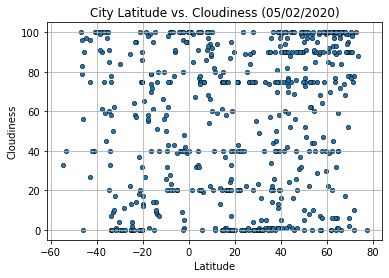

In [25]:
# Create Scatter Plot displaying Latitude to Max Temperature (F)
lat_vs_cloudiness_df.plot('Lat', 'Cloudiness', kind='scatter', grid=True, title=f'City Latitude vs. Cloudiness ({date_retreived_data})', edgecolors='black', linewidths=.5, yticks=(np.arange(0, 101, 20)))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Save Scatter Plot and display plot
plt.savefig("./output/lat_vs_cloudiness_scatter.png")
plt.show()

## Latitude vs. Wind Speed Plot

In [26]:
# Load clean_city_data.csv
# Create new DF 
lat_vs_wind_full_df = pd.read_csv('./output/clean_city_data.csv', encoding='utf-8')
lat_vs_wind_full_df.head()

,City_Name,Lat,Lon,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,mataura,-46.19,168.86,58.95,74.0,83.0,2.93,NZ,1.588478e+09
1,butaritari,3.07,172.79,83.35,81.0,32.0,14.79,KI,1.588477e+09
2,san quintin,30.48,-115.95,64.45,77.0,0.0,14.63,MX,1.588477e+09
3,georgetown,5.41,100.34,89.60,70.0,20.0,5.82,MY,1.588477e+09
4,homer,59.64,-151.55,51.80,53.0,40.0,8.05,US,1.588477e+09


In [28]:
# Remove unused columns leaving Humidity and Lat for plotting
lat_vs_wind_df=lat_vs_humid_full_df[['Wind_Speed', 'Lat']]
lat_vs_wind_df.head()

,Wind_Speed,Lat
0,2.93,-46.19
1,14.79,3.07
2,14.63,30.48
3,5.82,5.41
4,8.05,59.64


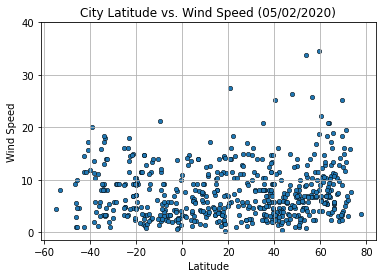

In [29]:
# Create Scatter Plot displaying Latitude to Max Temperature (F)
lat_vs_wind_df.plot('Lat', 
                    'Wind_Speed', 
                    kind='scatter', 
                    grid=True, 
                    title=f'City Latitude vs. Wind Speed ({date_retreived_data})', 
                    edgecolors='black',
                    linewidths=.5, 
                    yticks=(np.arange(0, 50, 10)))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Save Scatter Plot and display plot
plt.savefig("./output/lat_vs_wind_scatter.png")
plt.show()

## **Linear Regression**

OPTIONAL: Create a function to create Linear Regression plots

In [537]:
# Function: How to use hemisphereLinRegressPlots()
# hemisphereLinRegressPlots( Dataframe w/lat column, 'Northern or Southern' )
# ex: hemisphereLinRegressPlots(lat_vs_temp_df, 'Northern')

def hemisphereLinRegressPlots(df, hemisphere):
    # Copy DF for editing
    hemis_raw_df = df.copy()
    hemisphere=hemisphere.lower()
    
    if hemisphere == 'northern':
        # Filter lat to retreive northern hemisphere locations. 
        # All negative, or below zero in lat, are northern
        northern_hemis_df = hemis_raw_df.loc[hemis_raw_df['Lat'] > 0]
        name = 'Northern'
        hemis_df = northern_hemis_df
    elif hemisphere == 'southern':
        # Filter lat to retreive southern hemisphere locations. 
        # All negative, or below zero in lat, are southern
        southern_hemis_df = hemis_raw_df.loc[hemis_raw_df['Lat'] < 0]
        name = 'Southern'
        hemis_df = southern_hemis_df
    else:
        return print('Error: Must enter ''Northern'' or ''Southern'' as a Hemisphere.')
    
    # Begin lin.regression by assigning x,y values
    # Temp remove Lat column name to retreive OTHER column name for reuse. 
    # Lat is remove because it is on every DF we pass for hemisphere
    temp = hemis_df[hemis_df.columns.difference(['Lat'])].columns.unique()
    x_values = hemis_df['Lat']
    y_values = hemis_df[temp[0]]
    # Perform a linear regression on temperature vs. latitude
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    
    # Create line equation string
    # Get regression values
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # Rounding x,y values for x/y ticks
    def round_up(n, decimals=0):
        multiplier = 10 ** decimals
        return math.ceil(n * multiplier) / multiplier
    def round_down(n, decimals=0):
        multiplier = 10 ** decimals
        return math.floor(n * multiplier) / multiplier
    
    round_up_y = round_up(max(y_values), -1)
    round_down_y = round_down(min(y_values), -1)
    round_up_x = round_up(max(x_values), -1)
    round_down_x = round_down(min(x_values), -1)
    
    # Begin Plotting
    # Create Plot: Southern Hemisphere - Y_VALUE vs. Latitude Linear Regression
    plt.figure(figsize=(9, 7))
    plt.scatter(x_values,y_values, edgecolors='black', linewidths=.5)
    plt.plot(x_values,regress_values,c="r")
    
    # Label plot and annotate the line equation
    if hemisphere == 'northern':
        plt.annotate(s=f'Lin. Equation: {line_eq}',xy=(round_down_x-1,round_up_y-4), fontsize=13,color="red")
    elif hemisphere == 'southern':
        plt.annotate(s=f'Lin. Equation: {line_eq}',xy=(round_down_x+1,round_up_y-3), fontsize=13,color="red")
                 
    plt.xticks(np.arange(round_down_x, round_up_x+1, 10.0))
    plt.yticks(np.arange(round_down_y, round_up_y+1, 10.0))
    plt.xticks(np.arange(round_down_x, round_up_x+1, 10.0))
    plt.yticks(np.arange(round_down_y, round_up_y+1, 10.0))        
    plt.xlabel('Latitude')
    plt.ylabel(temp[0])
    plt.title(label=f'{name} Hemisphere: City Latitude vs. {temp[0]} ({date_retreived_data})', fontweight="bold")
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    
    return plt.show()

In [538]:
# hemisphereLinRegressPlots(lat_vs_cloudiness_df, 'Northern')

Error: Must enter Northern or Southern as a Hemisphere.


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7786155992787767


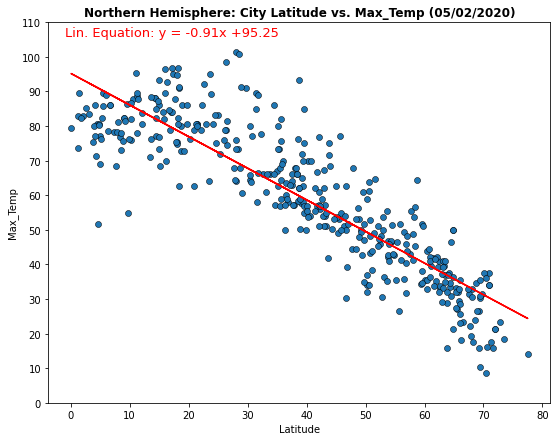

In [539]:
hemisphereLinRegressPlots(lat_vs_temp_df, 'Northern')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7786155992787767


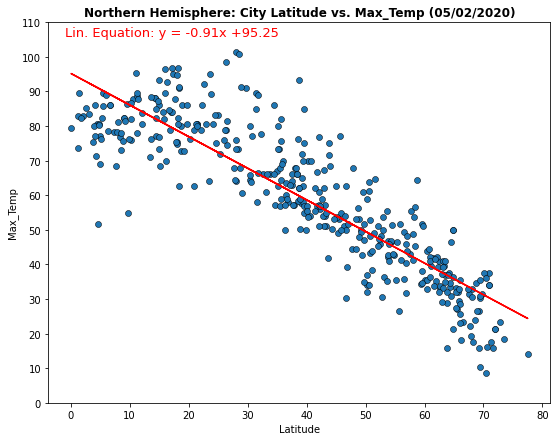

In [540]:
hemisphereLinRegressPlots(lat_vs_temp_df, 'Northern')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.05651476012124303


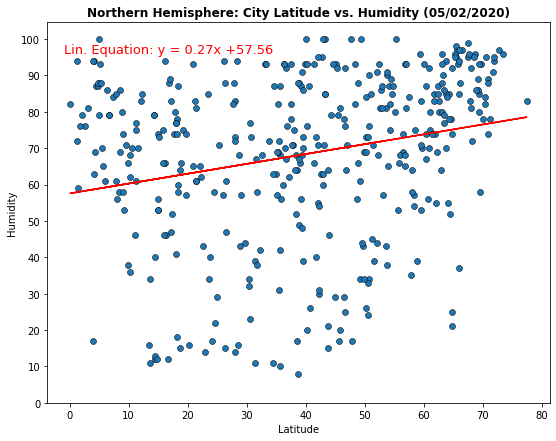

In [541]:
hemisphereLinRegressPlots(lat_vs_humid_df, 'Northern')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.004306955341957042


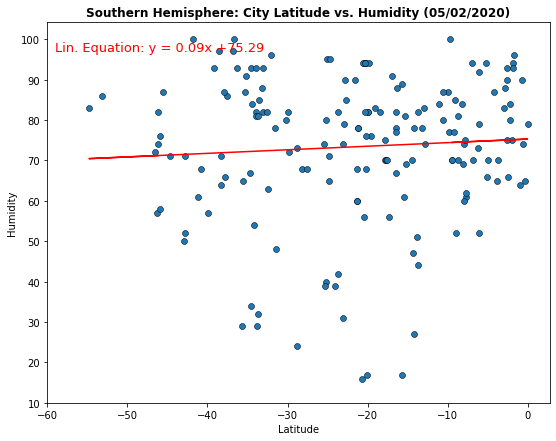

In [542]:
hemisphereLinRegressPlots(lat_vs_humid_df, 'Southern')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.03884800653064593


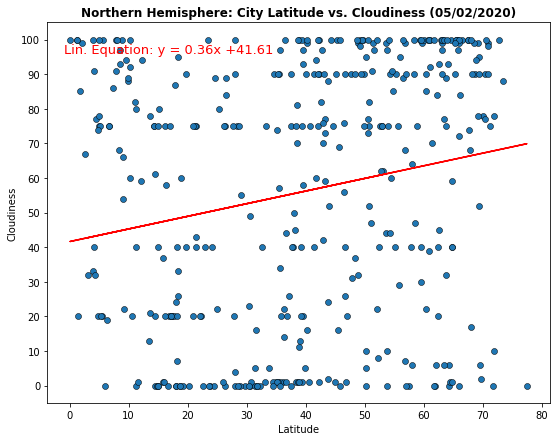

In [543]:
hemisphereLinRegressPlots(lat_vs_cloudiness_df, 'Northern')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0011133516720935811


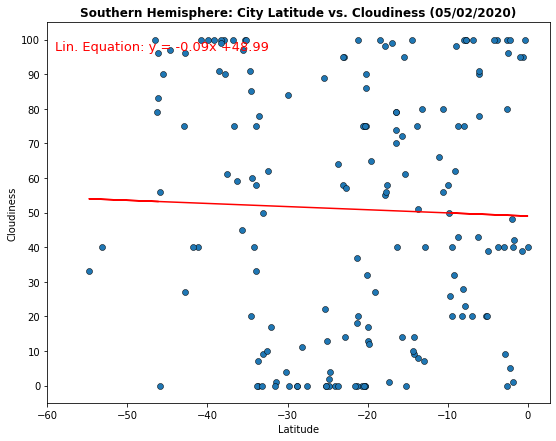

In [544]:
hemisphereLinRegressPlots(lat_vs_cloudiness_df, 'Southern')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.01875817260539508


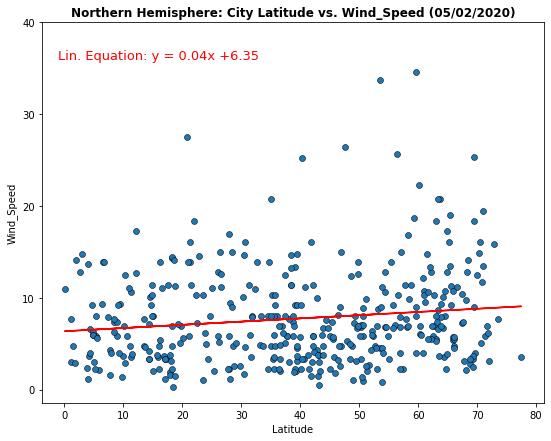

In [545]:
hemisphereLinRegressPlots(lat_vs_wind_df, 'Northern')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.05068524698018808


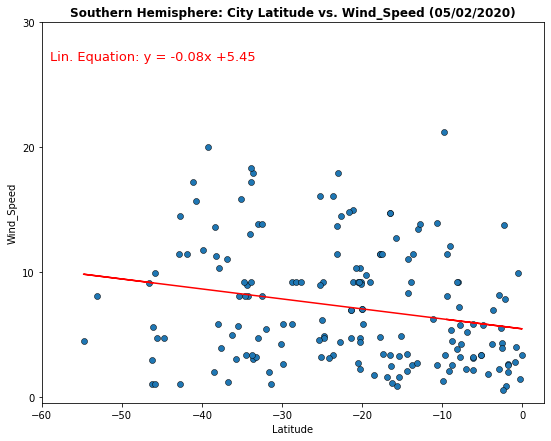

In [546]:
hemisphereLinRegressPlots(lat_vs_wind_df, 'Southern')